Если истинная зависимость Y от X оказывается более сложной,чем линейная, можно подобрать подходящее преобразование признаков и т.о. перейти к пространству, в котором зависимость будет хорошо описываться линейной моделью.

Рассмотрим модельный пример, чтобы понять, что происходит при рассмотрении разных функций от X в качестве новых признаков.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import  linear_model, metrics
%matplotlib inline

In [2]:
X=np.arange(1,6,1)

In [3]:
Y=np.array([6,9,10.5,12,13])

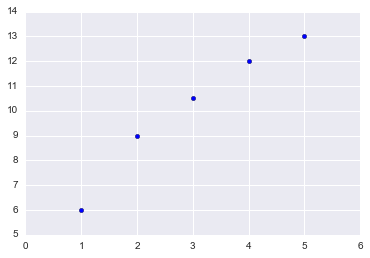

In [4]:
plt.scatter(X,Y)

In [5]:
data=pd.DataFrame(X)
y=pd.DataFrame(Y)

In [6]:
regressor=linear_model.LinearRegression()
regressor.fit(data,y)
Y_pred=regressor.predict(data)

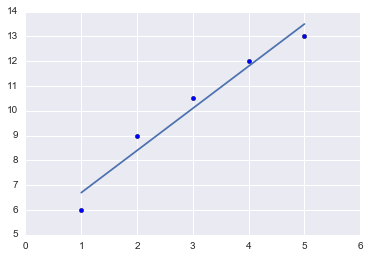

In [7]:
plt.scatter(X,Y)
plt.plot(X,Y_pred)

Посмотрим, как изменится график, если введём в качестве новых признаков мономы степени 2

In [8]:
from sklearn.preprocessing import PolynomialFeatures

transform = PolynomialFeatures(2)
data_poly = transform.fit_transform(data)
regressor.fit(data_poly,y)
Y_pred_poly=regressor.predict(data_poly)


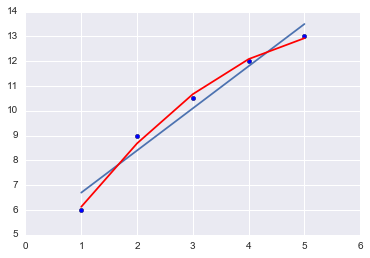

In [9]:
plt.scatter(X,Y)
plt.plot(X,Y_pred)
plt.plot(X,Y_pred_poly,color='r')

In [10]:
print 'Ошибка в модели с полиномиальными признаками', metrics.mean_absolute_error(Y,Y_pred_poly)
print 'Ошибка в модели без  полиномиальных признаков',metrics.mean_absolute_error(Y,Y_pred)

Ошибка в модели с полиномиальными признаками 0.154285714286
Ошибка в модели без  полиномиальных признаков 0.48


Применим логарифмирование к данным  $f_i(x) \rightarrow ln(\ |f_i(x)|\ + 1)$

In [11]:
from sklearn.preprocessing import FunctionTransformer
transformer = FunctionTransformer(func=np.log)
data_log=transformer.fit_transform(data)

In [12]:
regressor.fit(data_log,y)
Y_pred_log=regressor.predict(data_log)

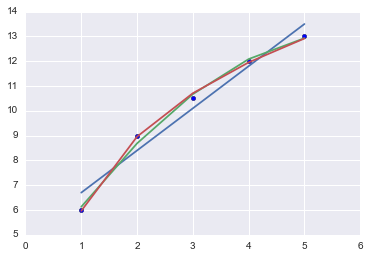

In [13]:
plt.scatter(X,Y)
plt.plot(X,Y_pred)
plt.plot(X,Y_pred_poly)
plt.plot(X,Y_pred_log)

In [14]:
print 'Ошибка в модели с логарифмированием', metrics.mean_absolute_error(Y,Y_pred_log)

Ошибка в модели с логарифмированием 0.0838239182689
